In [ ]:
import pandas as pd
import plotly.express as px

data = [
    {
        "Stage": "1. Proof of Concept",
        "Start": "2023-11-01",
        "Finish": "2024-01-01",
        "Summary": "Develop and test initial text classification proof of concept. Evaluate feasibility and accuracy."
    },
    {
        "Stage": "2. Business Plan & Approvals",
        "Start": "2024-01-01",
        "Finish": "2024-07-29",
        "Summary": "Prepare comprehensive business plan; secure approvals from RMS leadership, legal, and IT."
    },
    {
        "Stage": "3. Planning & Requirements",
        "Start": "2024-07-01",
        "Finish": "2024-11-30",
        "Summary": "Gather requirements, set success criteria, define data privacy needs, and finalize pipelines."
    },
    {
        "Stage": "4. Training Data Collection & Preparation",
        "Start": "2024-02-01",
        "Finish": "2024-12-05",
        "Summary": "Clean and prepare Workers’ Comp and General Comments data. Tokenize, lemmatize, standardize terms."
    },
    {
        "Stage": "5. Model Development",
        "Start": "2024-12-01",
        "Finish": "2025-01-01",
        "Summary": "Select ML models, evaluate approaches, train/tune models for accuracy and precision."
    },
    {
        "Stage": "6. Testing & Validation",
        "Start": "2025-01-01",
        "Finish": "2025-02-17",
        "Summary": "Cross-validate, build real-time/batch interfaces, conduct user acceptance testing."
    },
    {
        "Stage": "7. Integration & Parallel Run",
        "Start": "2025-02-17",
        "Finish": "2025-03-14",
        "Summary": "Integrate trained models into automated system. Run parallel to existing processes."
    },
    {
        "Stage": "8. Go-Live and Post Launch Monitoring",
        "Start": "2025-03-17",
        "Finish": "2025-05-02",
        "Summary": "Deploy solution for production use, transitioning from parallel to full implementation. Track model performance, retrain as needed, and gather user feedback for refinements."
    }
]

df = pd.DataFrame(data)

fig = px.timeline(
    df,
    x_start="Start",
    x_end="Finish",
    y="Stage",
    hover_data={"Summary": True},  
    color="Stage",                 
    text="Stage",                
)

# Reverse the Y-axis so that stage 1 appears at the top
#fig.update_yaxes(autorange="reversed")


fig.update_layout(
    title="Project Timeline with Key Stages and Summaries",
    height=600,
    xaxis=dict(
        tickformat="%b %d, %Y",  
        title="Dates"
    ),
    yaxis=dict(
        title="Project Stages"
    ),
    showlegend=False
)

fig.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import textwrap

stages = [
    {
        "stage_name": "1. Proof of Concept",
        "start_date": "2023-11-01",
        "end_date": "2024-01-01",
        "summary": "Develop & test initial text classification proof of concept. Evaluate feasibility & accuracy."
    },
    {
        "stage_name": "2. Business Plan & Approvals",
        "start_date": "2024-01-01",
        "end_date": "2024-07-29",
        "summary": "Prepare comprehensive business plan; secure approvals from RMS leadership, legal, and IT."
    },
    {
        "stage_name": "3. Planning & Requirements",
        "start_date": "2024-07-01",
        "end_date": "2024-11-30",
        "summary": "Gather requirements, set success criteria, define data privacy needs, and finalize pipelines."
    },
    {
        "stage_name": "4. Training Data Collection & Prep",
        "start_date": "2024-02-01",
        "end_date": "2024-12-05",
        "summary": "Clean & prepare data. Tokenize, lemmatize, remove stop words. Perform manual labeling."
    },
    {
        "stage_name": "5. Model Development",
        "start_date": "2024-12-01",
        "end_date": "2025-01-01",
        "summary": "Select ML models, train & tune for accuracy, precision, and other performance metrics."
    },
    {
        "stage_name": "6. Testing & Validation",
        "start_date": "2025-01-01",
        "end_date": "2025-02-17",
        "summary": "Cross-validate, build real-time/batch interfaces, conduct user acceptance testing."
    },
    {
        "stage_name": "7. Integration & Parallel Run",
        "start_date": "2025-02-17",
        "end_date": "2025-03-14",
        "summary": "Integrate trained models into the automated system; run parallel to existing processes."
    },
    {
        "stage_name": "8. Go-Live",
        "start_date": "2025-03-17",
        "end_date": "2025-03-17",
        "summary": "Deploy solution for production use. Transition from parallel testing to full implementation."
    },
    {
        "stage_name": "9. Post-Launch Monitoring",
        "start_date": "2025-03-17",
        "end_date": "2025-05-02",
        "summary": "Track model performance, retrain if needed, and gather user feedback for refinements."
    },
]

def to_datetime(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

# Convert start/end to datetime and track min/max
for s in stages:
    s["start_dt"] = to_datetime(s["start_date"])
    s["end_dt"] = to_datetime(s["end_date"])

min_date = min(s["start_dt"] for s in stages)
max_date = max(s["end_dt"] for s in stages)

# Create figure and axis
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Project Timeline with Key Stages and Summaries", fontsize=14, fontweight='bold')
ax.set_xlim(min_date - timedelta(days=10), max_date + timedelta(days=10))

# Remove y-axis label, since we'll list stages horizontally
ax.set_yticks([])
ax.set_ylabel("")

# Format x-axis for dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', labelsize=10, rotation=30)

# We'll place each stage on a separate "row" (y= n)
# and draw a horizontal bar from start to end
for i, stage in enumerate(stages):
    y_pos = i + 1  # row index (1-based)
    
    start_dt = stage["start_dt"]
    end_dt = stage["end_dt"]
    name = stage["stage_name"]
    
    # Draw a horizontal bar (thicker line for a Gantt-like style)
    ax.hlines(y=y_pos, xmin=start_dt, xmax=end_dt, color='skyblue', linewidth=6)
    
    # Place small circles at the start & end
    ax.plot(start_dt, y_pos, 'o', color='navy')
    ax.plot(end_dt, y_pos, 'o', color='navy')
    
    # Decide text bubble location: above or below the bar
    # We'll alternate to reduce overlap
    if i % 2 == 0:
        text_y = y_pos + 0.3
    else:
        text_y = y_pos - 0.3
    
    # Wrap the summary text for better readability
    wrapped_summary = "\n".join(textwrap.wrap(stage["summary"], width=45))
    annotation_text = f"{name}\n{wrapped_summary}"
    
    # Place the text near the midpoint
    mid_dt = start_dt + (end_dt - start_dt) / 2
    
    ax.text(
        mid_dt,
        text_y,
        annotation_text,
        ha='center',
        va='center',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.4", fc="lightblue", ec="blue", alpha=0.6)
    )

# Adjust y-limits to fit all bars plus their text
ax.set_ylim(0, len(stages) + 1)

plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define stages with just the name and date range
stages = [
    {
        "stage": "1. Proof of Concept",
        "start_date": "2023-11-01",
        "end_date": "2024-01-01",
    },
    {
        "stage": "2. Business Plan & Approvals",
        "start_date": "2024-01-01",
        "end_date": "2024-07-29",
    },
    {
        "stage": "3. Planning & Requirements",
        "start_date": "2024-07-01",
        "end_date": "2024-11-30",
    },
    {
        "stage": "4. Training Data Collection & Prep",
        "start_date": "2024-02-01",
        "end_date": "2024-12-05",
    },
    {
        "stage": "5. Model Development",
        "start_date": "2024-12-01",
        "end_date": "2025-01-01",
    },
    {
        "stage": "6. Testing & Validation",
        "start_date": "2025-01-01",
        "end_date": "2025-02-17",
    },
    {
        "stage": "7. Integration & Parallel Run",
        "start_date": "2025-02-17",
        "end_date": "2025-03-14",
    },
    {
        "stage": "8. Go-Live",
        "start_date": "2025-03-17",
        "end_date": "2025-03-17",
    },
    {
        "stage": "9. Post-Launch Monitoring",
        "start_date": "2025-03-17",
        "end_date": "2025-05-02",
    },
]

def to_datetime(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

# Convert date strings to datetime and track min/max
for s in stages:
    s["start_dt"] = to_datetime(s["start_date"])
    s["end_dt"] = to_datetime(s["end_date"])

min_date = min(s["start_dt"] for s in stages)
max_date = max(s["end_dt"] for s in stages)

# Create the figure
fig, ax = plt.subplots(figsize=(24, 12))

ax.set_title("Project Timeline – Key Stages", fontsize=18, fontweight="bold")

# Expand the x-limits a little beyond the earliest & latest dates
ax.set_xlim(min_date - timedelta(days=10), max_date + timedelta(days=10))

# Hide the y-axis; we'll manually place each stage line
ax.set_yticks([])
ax.set_ylabel("")

# Format the x-axis to show Month-Year, slightly rotated
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=30, fontsize=18)

# Place each stage on its own row
# We'll just use a spacing so stage 1 is near the top and stage 9 near the bottom
for i, stage in enumerate(stages):
    # y position: top is stage 1, bottom is stage 9
    y_pos = len(stages) - i  # or reversed
    
    start_dt = stage["start_dt"]
    end_dt = stage["end_dt"]
    
    # Draw a thick horizontal line
    ax.hlines(y=y_pos, xmin=start_dt, xmax=end_dt, color="steelblue", linewidth=6)
    
    # Place small circles at start & end
    ax.plot(start_dt, y_pos, "o", color="navy")
    ax.plot(end_dt, y_pos, "o", color="navy")
    
    # Label the stage name to the left of the bar (just for clarity)
    ax.text(
        start_dt - timedelta(days=5),  # shift left by a few days
        y_pos,
        stage["stage"],
        ha="right",
        va="center",
        fontsize=16,
        fontweight="bold",
    )

# Adjust the y-limits
ax.set_ylim(0.5, len(stages) + 0.5)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# -----------------------------------
# 1) Define stages (name + date range)
# -----------------------------------
stages = [
    {"stage": "1. Proof of Concept",             "start": "2023-11-01", "end": "2024-01-01"},
    {"stage": "2. Business Plan & Approvals",    "start": "2024-01-01", "end": "2024-07-29"},
    {"stage": "3. Planning & Requirements",      "start": "2024-07-01", "end": "2024-11-30"},
    {"stage": "4. Data Collection & Prep",       "start": "2024-02-01", "end": "2024-12-05"},
    {"stage": "5. Model Development",            "start": "2024-12-01", "end": "2025-01-01"},
    {"stage": "6. Testing & Validation",         "start": "2025-01-01", "end": "2025-02-17"},
    {"stage": "7. Integration & Parallel Run",   "start": "2025-02-17", "end": "2025-03-14"},
    {"stage": "8. Go-Live",                      "start": "2025-03-17", "end": "2025-03-17"},
    {"stage": "9. Post-Launch",       "start": "2025-03-17", "end": "2025-05-02"},
]

def to_dt(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

for s in stages:
    s["start_dt"] = to_dt(s["start"])
    s["end_dt"]   = to_dt(s["end"])

min_date = min(s["start_dt"] for s in stages)
max_date = max(s["end_dt"]   for s in stages)

# ------------------------------------------------
# 2) Create a figure large enough for readability
# ------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title("Project Timeline – Key Stages", fontsize=14, fontweight="bold")

# Give extra room so labels won't be cut off
ax.set_xlim(min_date - timedelta(days=15), max_date + timedelta(days=15))

# Hide y-axis (we'll manually space each stage row)
ax.set_yticks([])
ax.set_ylabel("")

# Format x-axis dates: Month Year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=30, fontsize=10)

# ---------------------------------------------
# 3) Plot each stage in its own row (Gantt style)
# ---------------------------------------------
spacing = 5.0  # vertical gap between stages
for i, stage in enumerate(stages):
    # from top to bottom: stage 1 at y ~ 9, stage 9 at y ~ 1
    y_pos = len(stages) - i
    
    start_dt = stage["start_dt"]
    end_dt   = stage["end_dt"]
    
    # Draw horizontal bar
    ax.hlines(y=y_pos, xmin=start_dt, xmax=end_dt, color="steelblue", linewidth=8)
    
    # Mark start & end with circles
    ax.plot([start_dt, end_dt], [y_pos, y_pos], "o", color="navy")
    
    # Place label in the middle of the bar
    mid_dt = start_dt + (end_dt - start_dt)/2
    
    # Slight vertical offset above the line so text is clearly visible
    label_y = y_pos + 0.25
    
    ax.text(
        mid_dt,
        label_y,
        stage["stage"],
        ha="center",
        va="bottom",
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec="blue", alpha=0.6)
    )

# Adjust vertical limits so all bars fit nicely
ax.set_ylim(0.5, len(stages) + 1)

plt.tight_layout()
plt.show()


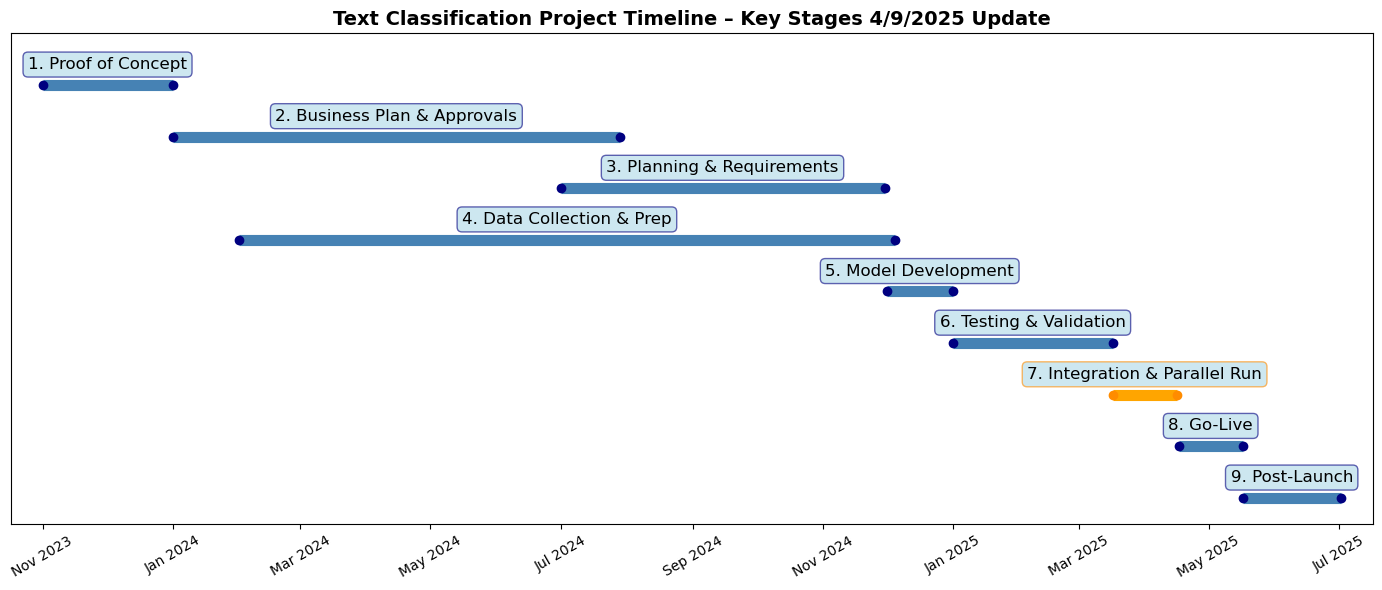

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# -----------------------------------
# 1) Define stages (name + date range)
# -----------------------------------
stages = [
    {"stage": "1. Proof of Concept",             "start": "2023-11-01", "end": "2024-01-01"},
    {"stage": "2. Business Plan & Approvals",    "start": "2024-01-01", "end": "2024-07-29"},
    {"stage": "3. Planning & Requirements",      "start": "2024-07-01", "end": "2024-11-30"},
    {"stage": "4. Data Collection & Prep",       "start": "2024-02-01", "end": "2024-12-05"},
    {"stage": "5. Model Development",            "start": "2024-12-01", "end": "2025-01-01"},  # Highlight
    {"stage": "6. Testing & Validation",         "start": "2025-01-01", "end": "2025-03-17"},  # Highlight
    {"stage": "7. Integration & Parallel Run",   "start": "2025-03-17", "end": "2025-04-16"},
    {"stage": "8. Go-Live",                      "start": "2025-04-17", "end": "2025-05-17"},
    {"stage": "9. Post-Launch",       "start": "2025-05-17", "end": "2025-07-02"},
]

def to_dt(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

for s in stages:
    s["start_dt"] = to_dt(s["start"])
    s["end_dt"]   = to_dt(s["end"])

min_date = min(s["start_dt"] for s in stages)
max_date = max(s["end_dt"]   for s in stages)

# ------------------------------------------------
# 2) Create a figure large enough for readability
# ------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title("Text Classification Project Timeline – Key Stages 4/9/2025 Update", fontsize=14, fontweight="bold")

# Give extra room so labels won't be cut off
ax.set_xlim(min_date - timedelta(days=15), max_date + timedelta(days=15))

# Hide y-axis (we'll manually space each stage row)
ax.set_yticks([])
ax.set_ylabel("")

# Format x-axis dates: Month Year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=30, fontsize=10)

# ---------------------------------------------
# 3) Plot each stage in its own row (Gantt style)
# ---------------------------------------------
for i, stage in enumerate(stages):
    # from top to bottom: stage 1 at y ~ 9, stage 9 at y ~ 1
    y_pos = len(stages) - i
    
    start_dt = stage["start_dt"]
    end_dt   = stage["end_dt"]
    stage_name = stage["stage"]
    
    # Decide if we highlight this stage
    if stage_name.startswith("7.") or stage_name.startswith("7."):
        bar_color = "orange"       # highlight color
        edge_color = "darkorange"
        bar_width = 8             # slightly thicker bar
    else:
        bar_color = "steelblue"    # default color
        edge_color = "navy"
        bar_width = 8
    
    # Draw horizontal bar
    ax.hlines(y=y_pos, xmin=start_dt, xmax=end_dt, color=bar_color, linewidth=bar_width)
    
    # Mark start & end with circles
    ax.plot([start_dt, end_dt], [y_pos, y_pos], "o", color=edge_color)
    
    # Place label in the middle of the bar
    mid_dt = start_dt + (end_dt - start_dt)/2
    
    # Slight vertical offset above the line so text is clearly visible
    label_y = y_pos + 0.25
    
    ax.text(
        mid_dt,
        label_y,
        stage_name,
        ha="center",
        va="bottom",
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec=edge_color, alpha=0.6)
    )

# Adjust vertical limits so all bars fit nicely
ax.set_ylim(0.5, len(stages) + 1)

plt.tight_layout()
plt.show()
